# **Organisation nationale de lutte contre le faux-monnayage**
# Détection de faux billets
# Partie 1 : Analyse et pré-traitement

# Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as sk
import scipy as sp
import numpy
from pickle import dump

In [2]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
# Formatage 

#separateur milliers
pd.options.display.float_format = '{:,.2f}'.format

# Couleurs
red_a400 = '#ff1744'
indigo_a100 = '#8c9eff'
indigo_a400 = '#3d5afe'
indigo_a700 = '#304ffe'
bluegrey_900 = '#263238'
teal_a400 = '#1de9b6'
purple_a400 = '#d500f9'
yellow_a400 = '#ffea00'
bluegrey_900 = '#263238'
palette_5 = [teal_a400, indigo_a400, red_a400, yellow_a400, purple_a400]


# Importation du fichier **billets**

In [4]:
billets = pd.read_csv('./Data/billets.csv', delimiter=";")
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [5]:
df = billets.copy()

# Prétraitement

In [6]:
from sklearn import preprocessing

In [7]:
df["check"]=df["is_genuine"].copy()

In [8]:
df1 = df.replace({"check":{True:1 ,False:0}})
df1.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,check
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1
1,True,171.46,103.36,103.66,3.77,2.99,113.09,1
2,True,172.69,104.48,103.50,4.40,2.94,113.16,1
3,True,171.36,103.91,103.94,3.62,3.01,113.51,1
4,True,171.73,104.28,103.46,4.04,3.48,112.54,1


# EXPLORATION

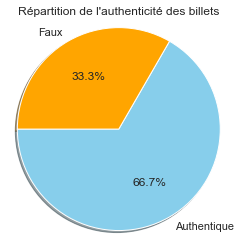

In [9]:
plt.figure(figsize=(4,4))

sns.set_theme(style = "white")

plt.title("Répartition de l'authenticité des billets",size =12)

labels = 'Authentique', 'Faux',
sizes = [df1['is_genuine'].sum(),len(df1)-df1['is_genuine'].sum()]
colors = ['skyblue','orange']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')


plt.show()

In [10]:
print("Il y à {}".format(df1["is_genuine"].loc[df1["is_genuine"]==1].count()),"vrai billets dans le dataframe")
print("Il y à {}".format(df1["is_genuine"].loc[df1["is_genuine"]==0].count()),"faux billets dans le dataframe")

Il y à 1000 vrai billets dans le dataframe
Il y à 500 faux billets dans le dataframe


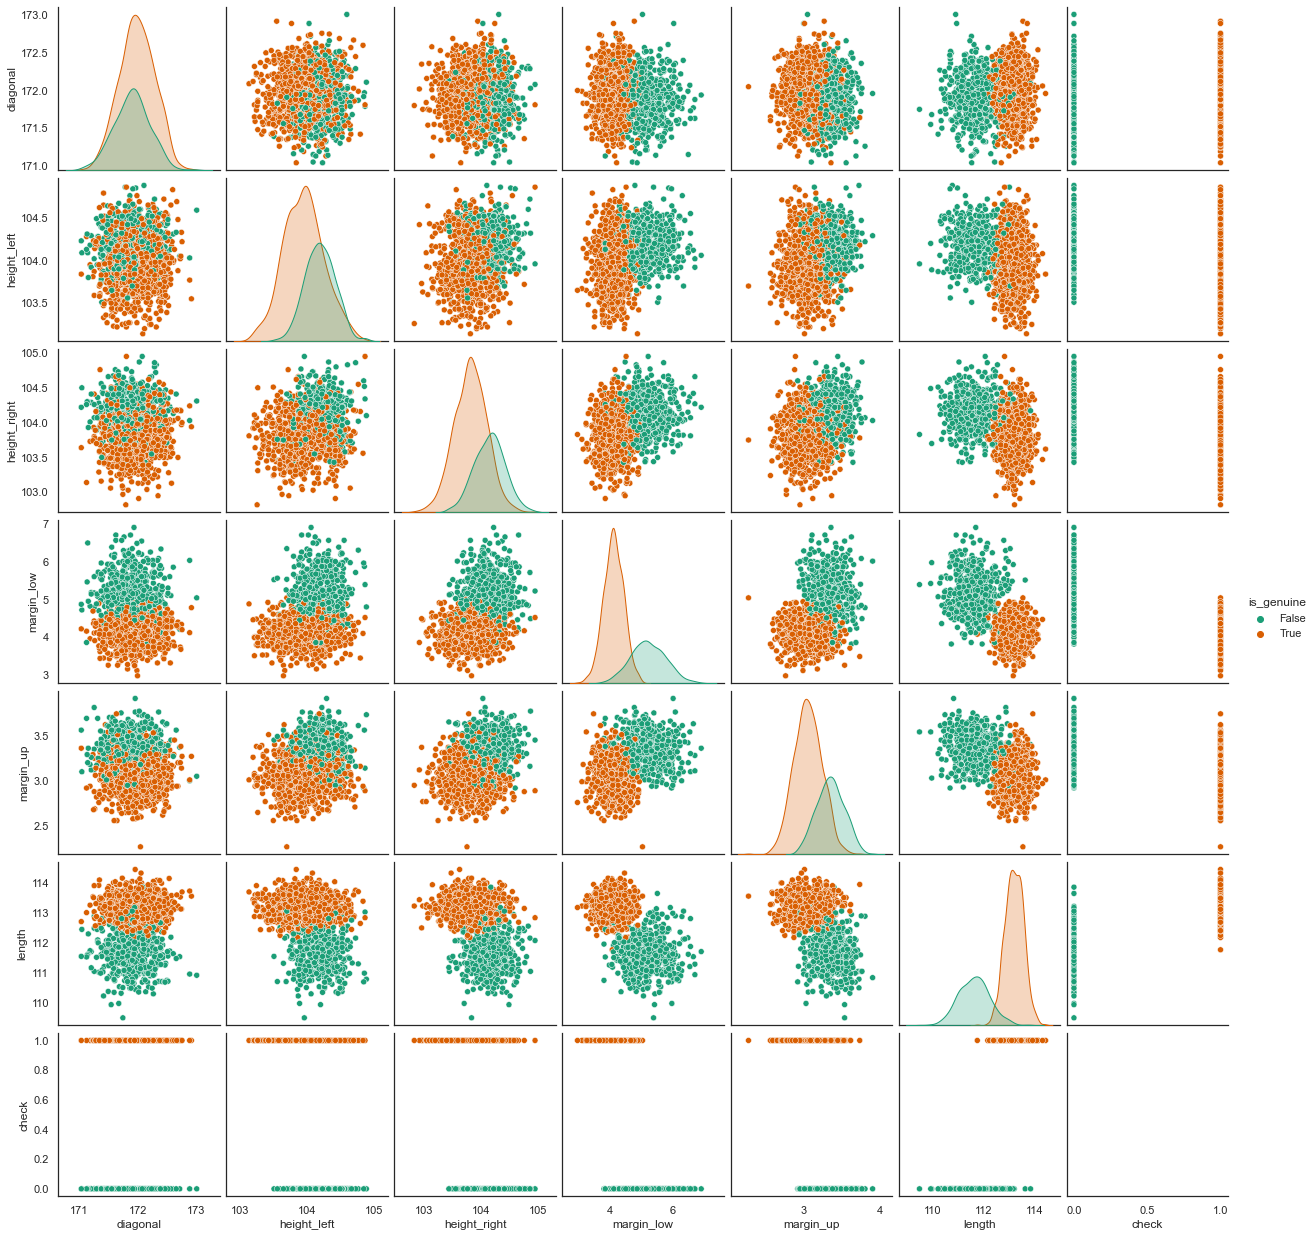

In [11]:
# schuffle neutralise la hierarchie de 0 et 1
sns.pairplot(df1.sample(n=len(df1), random_state=5),hue='is_genuine',palette='Dark2')

Text(0.5, 1.0, 'séparabilité des clusters avec la variable diagonal')

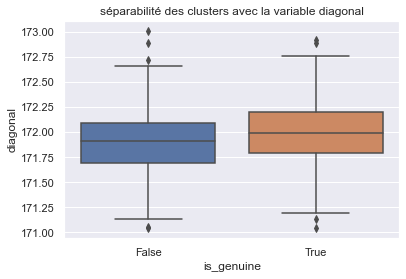

In [12]:
sns.set()

ax = sns.boxplot(x="is_genuine", y="diagonal", data=df)
plt.title('séparabilité des clusters avec la variable diagonal')

Text(0.5, 1.0, 'séparabilité des clusters avec la variable length')

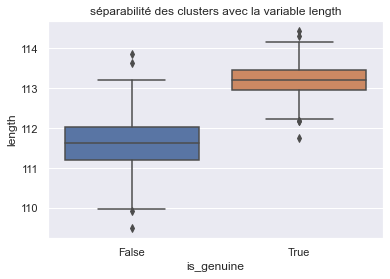

In [13]:
sns.set()

ax = sns.boxplot(x="is_genuine", y="length", data=df)
plt.title('séparabilité des clusters avec la variable length')

Text(0.5, 1.0, 'séparabilité des clusters avec la variable margin_low')

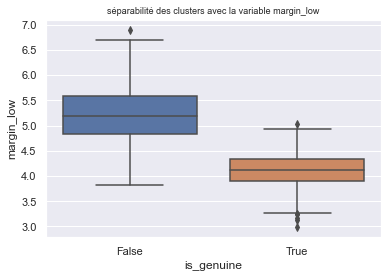

In [14]:
sns.set()

ax = sns.boxplot(x="is_genuine", y="margin_low", data=df)
plt.title('séparabilité des clusters avec la variable margin_low', size=9)

# Analyse descriptives:

In [15]:
df1.groupby("is_genuine").describe().T

is_genuine          False     True
diagonal     count 500.00 1,000.00
             mean  171.90   171.99
             std     0.31     0.30
             min   171.04   171.04
             25%   171.69   171.79
             50%   171.91   171.99
             75%   172.09   172.20
             max   173.01   172.92
height_left  count 500.00 1,000.00
             mean  104.19   103.95
             std     0.22     0.30
             min   103.51   103.14
             25%   104.04   103.74
             50%   104.18   103.95
             75%   104.33   104.14
             max   104.88   104.86
height_right count 500.00 1,000.00
             mean  104.14   103.81
             std     0.27     0.29
             min   103.43   102.82
             25%   103.95   103.61
             50%   104.16   103.81
             75%   104.32   104.00
             max   104.95   104.95
margin_low   count 492.00   971.00
             mean    5.22     4.12
             std     0.55     0.32
             min     3.82     2.98
             25%     4.84     3.91
             50%     5.19     4.11
             75%     5.59     4.34
             max     6.90     5.04
margin_up    count 500.00 1,000.00
             mean    3.35     3.05
             std     0.18     0.19
             min     2.92     2.27
             25%     3.22     2.93
             50%     3.35     3.05
             75%     3.47     3.18
             max     3.91     3.74
length       count 500.00 1,000.00
             mean  111.63   113.20
             std     0.62     0.36
             min   109.49   111.76
             25%   111.20   112.95
             50%   111.63   113.20
             75%   112.03   113.46
             max   113.85   114.44
check        count 500.00 1,000.00
             mean    0.00     1.00
             std     0.00     0.00
             min     0.00     1.00
             25%     0.00     1.00
             50%     0.00     1.00
             75%     0.00     1.00
             max     0.00     1.00

In [16]:
# Moyennes des variables
df1.mean(axis=0)

is_genuine       0.67
diagonal       171.96
height_left    104.03
height_right   103.92
margin_low       4.49
margin_up        3.15
length         112.68
check            0.67
dtype: float64

In [17]:
# Ecarts_type des variables
df1.std(axis=0)

is_genuine     0.47
diagonal       0.31
height_left    0.30
height_right   0.33
margin_low     0.66
margin_up      0.23
length         0.87
check          0.47
dtype: float64

## Analyse bivariées

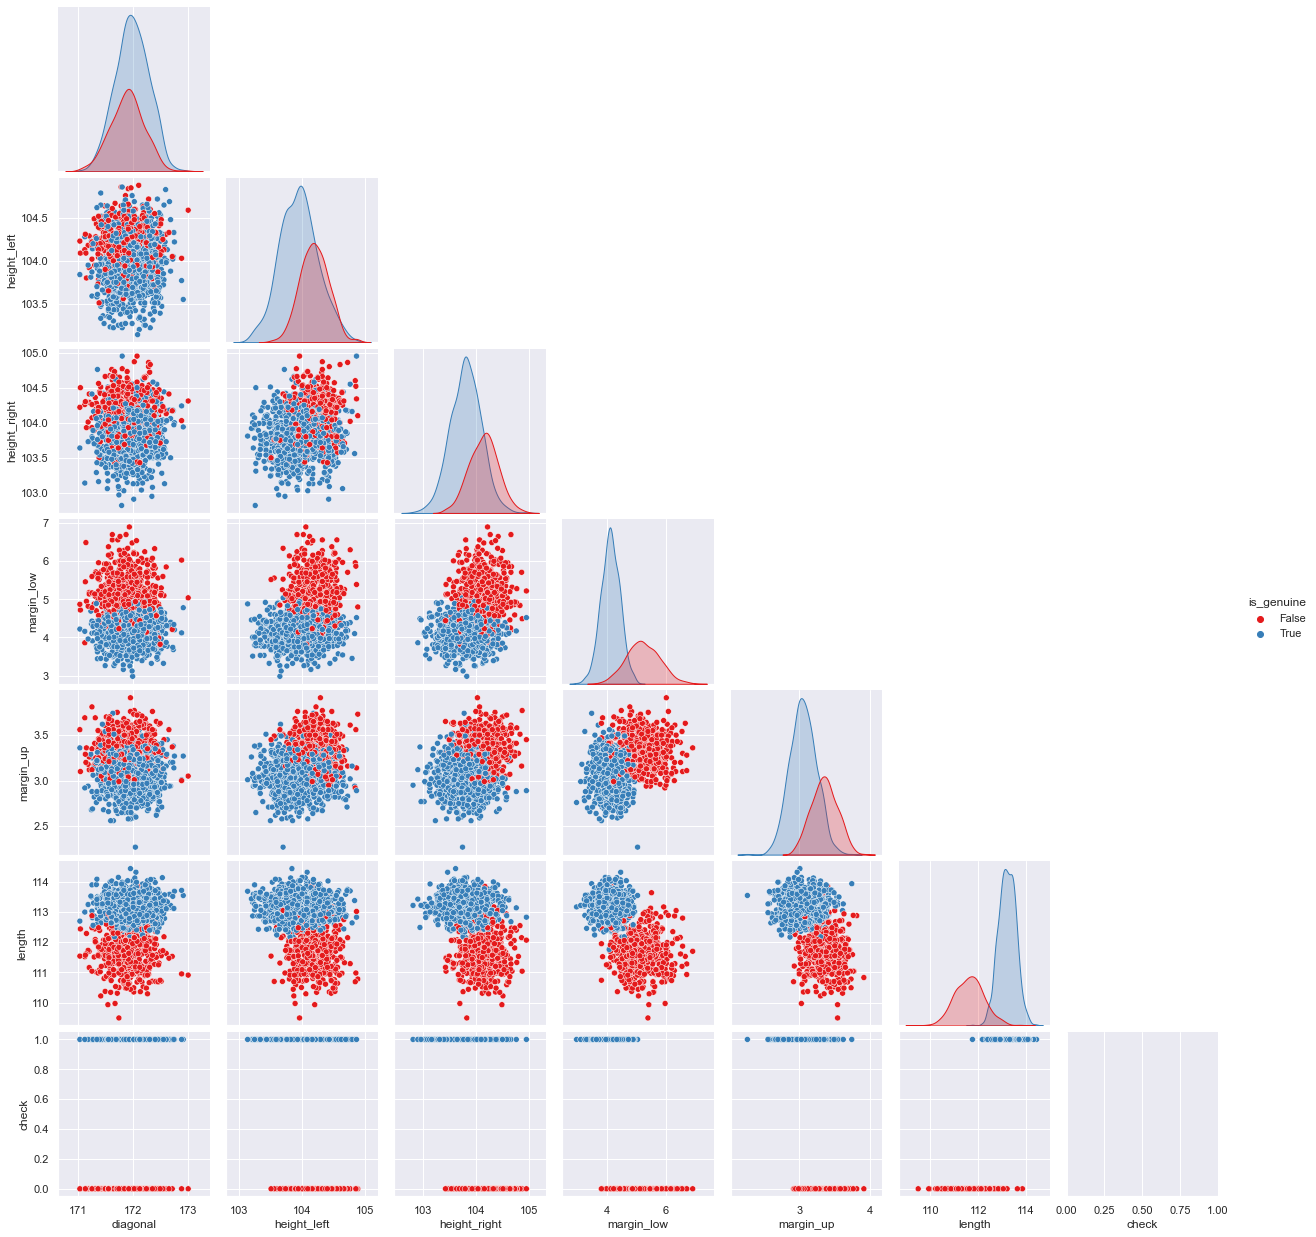

In [18]:
# schuffle neutralise la hierarchie de 0 et 1
sns.pairplot(df1.sample(n=len(df1), random_state=0),hue='is_genuine',palette='Set1',corner=True)

In [19]:
analyse_bi = df1.loc[:, 'diagonal':'length']

In [20]:
X = df1.loc[:, 'diagonal':'length']
y = df1.check

## Traitement des valeurs nulles

In [21]:
def evaluate(df):
    y = df["check"] # bool variable qualitative
    y = np.ravel(np.array(y),'F')
    X = df.loc[:, 'diagonal':'length']# Variables explicatives 
    return (X, y)

from sklearn.model_selection import train_test_split

In [22]:
df1.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
check            0
dtype: int64

In [23]:
# Extraction de mes valeurs nulles

NaN = df1[df1['margin_low'].isnull()]
NaN

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,check
72,True,171.94,103.89,103.45,NaN,3.25,112.79,1
99,True,171.93,104.07,104.18,NaN,3.14,113.08,1
151,True,172.07,103.80,104.38,NaN,3.02,112.93,1
197,True,171.45,103.66,103.80,NaN,3.62,113.27,1
241,True,171.83,104.14,104.06,NaN,3.02,112.36,1
251,True,171.80,103.26,102.82,NaN,2.95,113.22,1
284,True,171.92,103.83,103.76,NaN,3.23,113.29,1
334,True,171.85,103.70,103.96,NaN,3.00,113.36,1
410,True,172.56,103.72,103.51,NaN,3.12,112.95,1
413,True,172.30,103.66,103.50,NaN,3.16,112.95,1


### Méthode 1:  IterativeImputer() --> cleaned_df

In [24]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [25]:
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
imp_mean = IterativeImputer(random_state=5,sample_posterior=True,initial_strategy='mean')

In [26]:

# Récupération du nom des colonnes
model_IterativeImputer = imp_mean.fit(df1)
cleaned_df = pd.DataFrame(imp_mean.transform(df1), columns = df1.columns)
cleaned_df.check = cleaned_df.check.astype(int)
cleaned_df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,check
0,1.00,171.81,104.86,104.95,4.52,2.89,112.83,1
1,1.00,171.46,103.36,103.66,3.77,2.99,113.09,1
2,1.00,172.69,104.48,103.50,4.40,2.94,113.16,1
3,1.00,171.36,103.91,103.94,3.62,3.01,113.51,1
4,1.00,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
1495,0.00,171.75,104.38,104.17,4.42,3.09,111.28,0
1496,0.00,172.19,104.63,104.44,5.27,3.37,110.97,0
1497,0.00,171.80,104.01,104.12,5.51,3.36,111.95,0
1498,0.00,172.06,104.28,104.06,5.17,3.46,112.25,0


In [27]:
cleaned_df.isna().sum().sum()

0

In [28]:
from sklearn.preprocessing import StandardScaler
X = (cleaned_df.set_index(["check","is_genuine"]))
features = X.columns
transformer = StandardScaler().fit(X)
X_scaled = pd.DataFrame(transformer.transform(X), columns=features)

cleaned_df = pd.DataFrame(cleaned_df.check).merge(X_scaled, left_index = True, right_index=True)
cleaned_df = cleaned_df.merge(df.is_genuine, left_index = True, right_index=True)
cleaned_df

,check,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,1,-0.49,2.77,3.16,0.03,-1.13,0.17,True
1,1,-1.63,-2.24,-0.80,-0.46,-0.70,0.47,True
2,1,2.40,1.50,-1.29,-0.05,-0.91,0.55,True
3,1,-1.96,-0.40,0.06,-0.55,-0.61,0.95,True
4,1,-0.75,0.84,-1.41,-0.28,1.42,-0.16,True
...,...,...,...,...,...,...,...,...
1495,0,-0.68,1.17,0.77,-0.04,-0.27,-1.60,False
1496,0,0.76,2.01,1.60,0.51,0.94,-1.96,False
1497,0,-0.52,-0.07,0.61,0.66,0.90,-0.84,False
1498,0,0.33,0.84,0.43,0.45,1.33,-0.49,False


In [29]:
X, y = evaluate(cleaned_df)

In [30]:
X

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.49,2.77,3.16,0.03,-1.13,0.17
1,-1.63,-2.24,-0.80,-0.46,-0.70,0.47
2,2.40,1.50,-1.29,-0.05,-0.91,0.55
3,-1.96,-0.40,0.06,-0.55,-0.61,0.95
4,-0.75,0.84,-1.41,-0.28,1.42,-0.16
...,...,...,...,...,...,...
1495,-0.68,1.17,0.77,-0.04,-0.27,-1.60
1496,0.76,2.01,1.60,0.51,0.94,-1.96
1497,-0.52,-0.07,0.61,0.66,0.90,-0.84
1498,0.33,0.84,0.43,0.45,1.33,-0.49


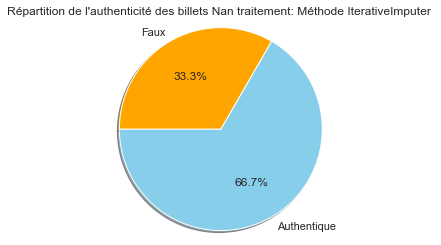

In [31]:
plt.figure(figsize=(4,4))

sns.set_theme(style = "white")

plt.title("Répartition de l'authenticité des billets Nan traitement: Méthode IterativeImputer ",size =12)

labels = 'Authentique', 'Faux',
sizes = [cleaned_df['is_genuine'].sum(),len(cleaned_df)-cleaned_df['is_genuine'].sum()]
colors = ['skyblue','orange']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')


plt.show()

#### Régression logistique sur le modèle 1

In [32]:
X, y = evaluate(cleaned_df)
dump(X.columns, open('./Assets/model-columns.pkl', 'wb'))
transformer = StandardScaler().fit(X)
dump(transformer, open('./Assets/transformer-reg-log-1.pkl', 'wb'))
X_scaled = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)
y_test = np.array(y_test)

In [33]:
reg_cleaned_df = LogisticRegression()
reg_cleaned_df.fit(X_train,y_train)
dump(reg_cleaned_df, open('./Assets/model-reg-log-1.pkl', 'wb'))

In [34]:
print("Résultat : Régression logistique du modèle 1")
print("")

print('Train score :',reg_cleaned_df.score(X_train, y_train))
print('Test score:',reg_cleaned_df.score(X_test,y_test))
# Matrice et résultats

y_pred_reg_cleaned_df= reg_cleaned_df.predict(X_test)
print(metrics.classification_report(y_test, y_pred_reg_cleaned_df))


print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_reg_cleaned_df))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_reg_cleaned_df).ravel()
TPR = tp/(tp+fn) # True Positive Rate (TPR)
FPR = fp/(tn+fp) # False Positive Rate (FPR)
TNR = tn/(tn+fp) # True Negative Rate (TNR)
FNR = fn/(tp+fn) # False Negative Rate (FNR)
print("")
# Affichage et lectude de la matruice de confusion
print("faux négatif:",fn, ", Vrai positif:",tp)
print("Vrai negatif:",tn,", Faux positif:", fp)
print("")
print("True Positive Rate: {:.2%}, ".format(TPR), "False Positive Rate {:.2%}, ".format(FPR))
print("True Negative Rate: {:.2%}, ".format(TNR), "False Negative Rate: {:.2%}, ".format(FNR))
print("")

Precision = tp/(tp+fp)
Recall = tp / (tp + fn)
F1_score = 2*((Precision * Recall)/(Precision + Recall))
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test, y_pred_reg_cleaned_df))
print("Score:")
print("Precision : {:.2%}".format(Precision))
print("Recall : {:.2%}".format(Recall))
print("F1_score : {:.2%}".format(F1_score))

MSE = metrics.mean_squared_error(y_test, y_pred_reg_cleaned_df)
rmse= (np.sqrt(mean_squared_error(y_test, y_pred_reg_cleaned_df)))
r2_pred = r2_score(y_test, y_pred_reg_cleaned_df)


print("Evaluation du modèle")
print('Coefficient de determination')
print('')
print("L'erreur quadratique moyenne (rmse) est {}".format(rmse))
print('le score R2 est {}'.format(r2_pred))
print('\n')

Résultat : Régression logistique du modèle 1

Train score : 0.9791666666666666
Test score: 0.9733333333333334
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       107
           1       0.96      0.99      0.98       193

    accuracy                           0.97       300
   macro avg       0.98      0.96      0.97       300
weighted avg       0.97      0.97      0.97       300


Confusion Matrix:
[[100   7]
 [  1 192]]

faux négatif: 1 , Vrai positif: 192
Vrai negatif: 100 , Faux positif: 7

True Positive Rate: 99.48%,  False Positive Rate 6.54%, 
True Negative Rate: 93.46%,  False Negative Rate: 0.52%, 

Score:
Precision : 96.48%
Recall : 99.48%
F1_score : 97.96%
Evaluation du modèle
Coefficient de determination

L'erreur quadratique moyenne (rmse) est 0.16329931618554522
le score R2 est 0.8837828676577406




### Méthode 2: df_dropna 

In [35]:
df_dropna = df1.dropna()
print("df NaN :", df1.isna().sum().sum())
print("df.shape :", df_dropna.shape)
print("df_dropna NaN :", df_dropna.isna().sum().sum())

df NaN : 37
df.shape : (1463, 8)
df_dropna NaN : 0


In [36]:
df_dropna

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,check
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1
1,True,171.46,103.36,103.66,3.77,2.99,113.09,1
2,True,172.69,104.48,103.50,4.40,2.94,113.16,1
3,True,171.36,103.91,103.94,3.62,3.01,113.51,1
4,True,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,0
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,0
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,0
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,0


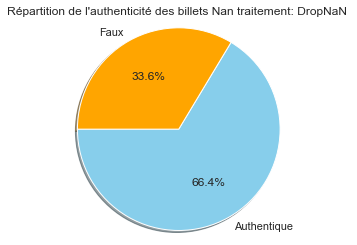

In [37]:
plt.figure(figsize=(4,4))

sns.set_theme(style = "white")

plt.title("Répartition de l'authenticité des billets Nan traitement: DropNaN ",size =12)

labels = 'Authentique', 'Faux',
sizes = [df_dropna['is_genuine'].sum(),len(df_dropna)-df_dropna['is_genuine'].sum()]
colors = ['skyblue','orange']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')


plt.show()

#### Régression logistique sur df_dropna

In [38]:
y=df_dropna[["check","is_genuine"]]
X = (df_dropna.set_index(["check","is_genuine"]))

In [39]:

transformer = StandardScaler().fit(X)
dump(transformer, open('./Assets/transformer-reg-log-2.pkl', 'wb'))

X_scaled = pd.DataFrame(transformer.transform(X), columns=features)

df_dropna = pd.DataFrame(y).merge(X_scaled, left_index = True, right_index=True, how="right")
df_dropna 

,check,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.00,True,-0.49,2.77,3.17,0.05,-1.14,0.18
1,1.00,True,-1.63,-2.24,-0.81,-1.08,-0.70,0.48
2,1.00,True,2.39,1.50,-1.30,-0.13,-0.92,0.56
3,1.00,True,-1.96,-0.41,0.06,-1.30,-0.62,0.96
4,1.00,True,-0.75,0.83,-1.42,-0.67,1.41,-0.15
...,...,...,...,...,...,...,...,...
1458,0.00,False,-0.69,1.16,0.77,-0.10,-0.27,-1.60
1459,0.00,False,0.76,2.00,1.60,1.18,0.94,-1.95
1460,0.00,False,-0.52,-0.07,0.61,1.54,0.89,-0.83
1461,0.00,False,0.33,0.83,0.43,1.03,1.33,-0.49


In [40]:
df_dropna = df_dropna.dropna()
df_dropna.isna().sum()

check           0
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [41]:
X, y = evaluate(df_dropna)
X_train_df_dropna, X_test_df_dropna, y_train_df_dropna, y_test_df_dropna = train_test_split(X, y, test_size=0.2, random_state=5)
#y_test = np.array(y_test)


In [42]:
reg = LogisticRegression()
reg_df_dropna = reg.fit(X_train_df_dropna,y_train_df_dropna)
dump(reg_df_dropna, open('./Assets/model-reg-log-2.pkl', 'wb'))

In [43]:
print("Résultat : Régression logistique du modèle 2 df_dropna")
print("")
y_pred_reg_df_dropna= reg_df_dropna.predict(X_test_df_dropna)

print('Train score :',reg_df_dropna.score(X_train_df_dropna, y_train_df_dropna))
print('Test score:',reg_df_dropna.score(X_test_df_dropna,y_test_df_dropna))
print("")
print(metrics.classification_report(y_test_df_dropna, y_pred_reg_df_dropna))
print("")
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test_df_dropna, y_pred_reg_df_dropna))
tn, fp, fn, tp = confusion_matrix(y_test_df_dropna, y_pred_reg_df_dropna).ravel()
TPR = tp/(tp+fn) # True Positive Rate (TPR)
FPR = fp/(tn+fp) # False Positive Rate (FPR)
TNR = tn/(tn+fp) # True Negative Rate (TNR)
FNR = fn/(tp+fn) # False Negative Rate (FNR)
print("")
# Affichage et lectude de la matruice de confusion
print("faux négatif:",fn, "Vrai positif:",tp)
print("Vrai negatif:",tn,"faux positif:", fp)
print("")
print("True Positive Rate: {:.2%}, ".format(TPR), "False Positive Rate {:.2%}, ".format(FPR))
print("True Negative Rate: {:.2%}, ".format(TNR), "False Negative Rate: {:.2%}, ".format(FNR))
print("")

Precision = tp/(tp+fp)
Recall = tp / (tp + fn)
F1_score = 2*((Precision * Recall)/(Precision + Recall))
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test_df_dropna, y_pred_reg_df_dropna))
print("Score:")
print("Precision : {:.2%}".format(Precision))
print("Recall : {:.2%}".format(Recall))
print("F1_score : {:.2%}".format(F1_score))

y_pred_modele_Xresampled = reg_df_dropna.predict(X_test)
MSE = metrics.mean_squared_error(y_test_df_dropna, y_pred_reg_df_dropna)
rmse= (np.sqrt(mean_squared_error(y_test_df_dropna, y_pred_reg_df_dropna)))
r2_pred = r2_score(y_test_df_dropna, y_pred_reg_df_dropna)

print('')
print('')
print("Evaluation du modèle")
print('Coefficient de determination')
print('')
print("L'erreur quadratique moyenne (rmse) est {}".format(rmse))
print('le score R2 est {}'.format(r2_pred))
print('\n')

Résultat : Régression logistique du modèle 2 df_dropna

Train score : 0.974561403508772
Test score: 0.9440559440559441

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92        97
         1.0       0.98      0.94      0.96       189

    accuracy                           0.94       286
   macro avg       0.93      0.95      0.94       286
weighted avg       0.95      0.94      0.94       286



Confusion Matrix:
[[ 93   4]
 [ 12 177]]

faux négatif: 12 Vrai positif: 177
Vrai negatif: 93 faux positif: 4

True Positive Rate: 93.65%,  False Positive Rate 4.12%, 
True Negative Rate: 95.88%,  False Negative Rate: 6.35%, 

Score:
Precision : 97.79%
Recall : 93.65%
F1_score : 95.68%


Evaluation du modèle
Coefficient de determination

L'erreur quadratique moyenne (rmse) est 0.23652495839563303
le score R2 est 0.7503954617356678




C:\Users\melle\anaconda3\envs\P10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Nombre de points par lot: [ 91 296 501 706 912]


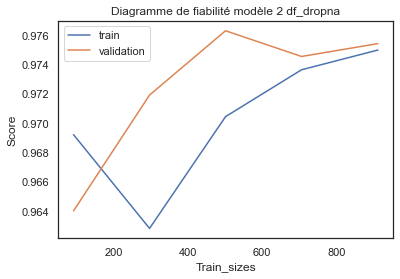

In [44]:
# train_size, je découpe X_train et Y train selon: debut 20%, fin 100%, avec demmande de 5 lots
N, train_score, val_score = learning_curve(reg_df_dropna , X_train_df_dropna , y_train_df_dropna ,
                                           train_sizes = np.linspace(0.1, 1.0, 5), cv=5)

print("Nombre de points par lot:",N)


plt.plot(N,train_score.mean(axis=1), label="train")
plt.plot(N,val_score.mean(axis=1), label="validation")
plt.xlabel("Train_sizes")
plt.ylabel("Score")
plt.title("Diagramme de fiabilité modèle 2 df_dropna")
plt.legend()


### Méthode 3: Régression linéaire 

In [45]:
df_Reglin = df.copy()

In [46]:
X, y = evaluate(df_Reglin)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_test = np.array(y_test)

In [47]:
%matplotlib inline

In [48]:
df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
check            0
dtype: int64

In [49]:
nan_rows = df_Reglin[df_Reglin['margin_low'].isna()]

df_Reglin = df_Reglin.dropna()

X = df_Reglin[['diagonal', 'height_left', 'height_right',
       'margin_up', 'length']]
y = df_Reglin['margin_low']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

x_test = pd.concat([X_test, nan_rows.drop(['margin_low'], axis=1)])
y_test = pd.concat([y_test, nan_rows['margin_low']])

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
reg = LinearRegression()
model_reg_lin = reg.fit(X_train, y_train)
model_reg_lin.score(X_train, y_train)

0.47789523641384146

In [52]:
prediction = model_reg_lin.predict(NaN[['diagonal', 'height_left', 'height_right',
       'margin_up', 'length']])

In [53]:
NaN['margin_low'] = prediction
add_values = NaN

C:\Users\melle\AppData\Local\Temp\ipykernel_18112\2300651390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NaN['margin_low'] = prediction


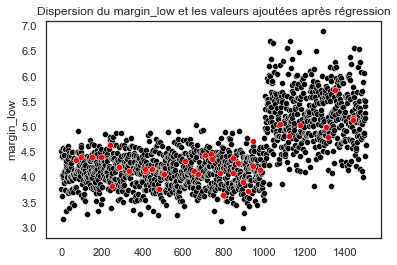

In [54]:
sns.scatterplot(data=df_Reglin['margin_low'],color='black')
sns.scatterplot(data=add_values['margin_low'],color='red')
plt.title('Dispersion du margin_low et les valeurs ajoutées après régression')
plt.show()

In [55]:
df_Reglin.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
check           0
dtype: int64

In [56]:
NaN['margin_low']

72     4.33
99     4.39
151    4.39
197    4.39
241    4.63
251    3.81
284    4.20
334    4.13
410    4.12
413    4.16
445    4.16
481    3.75
505    4.05
611    4.32
654    4.12
675    4.06
710    4.43
739    4.46
742    4.35
780    4.08
798    3.63
844    4.37
845    4.08
871    4.27
895    3.90
919    3.71
945    4.23
946    4.72
981    4.13
1076   5.04
1121   4.81
1176   5.04
1303   4.99
1315   4.79
1347   5.73
1435   5.18
1438   5.12
Name: margin_low, dtype: float64

In [57]:
df_regLin = df1.reset_index()
df_regLin.dropna(inplace=True)
df_regLin = df_regLin.set_index("index")
df_regLin

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,check
index,,,,,,,,
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1
1,True,171.46,103.36,103.66,3.77,2.99,113.09,1
2,True,172.69,104.48,103.50,4.40,2.94,113.16,1
3,True,171.36,103.91,103.94,3.62,3.01,113.51,1
4,True,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,0
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,0
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,0


In [58]:
df_regLin = pd.concat([df_regLin,NaN])
df_regLin = df_regLin.sort_index()
df_regLin

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,check
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1
1,True,171.46,103.36,103.66,3.77,2.99,113.09,1
2,True,172.69,104.48,103.50,4.40,2.94,113.16,1
3,True,171.36,103.91,103.94,3.62,3.01,113.51,1
4,True,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,0
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,0
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,0
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,0


In [59]:
df_regLin.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
check           0
dtype: int64

In [60]:
# train_size, je découpe X_train et Y train selon: debut 20%, fin 100%, avec demmande de 5 lots
N, train_score, val_score = learning_curve(model_reg_lin , X_train , y_train ,
                                           train_sizes = np.linspace(0.1, 1.0, 5), cv=5)

print("Nombre de points par lot:",N)


Nombre de points par lot: [ 93 304 514 725 936]


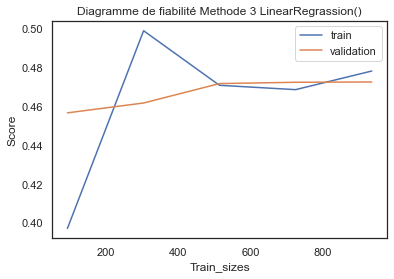

In [61]:

plt.plot(N,train_score.mean(axis=1), label="train")
plt.plot(N,val_score.mean(axis=1), label="validation")
plt.xlabel("Train_sizes")
plt.ylabel("Score")
plt.title("Diagramme de fiabilité Methode 3 LinearRegrassion()")
plt.legend()

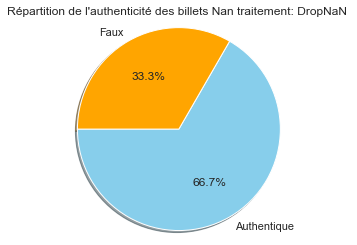

In [62]:
plt.figure(figsize=(4,4))

sns.set_theme(style = "white")

plt.title("Répartition de l'authenticité des billets Nan traitement: DropNaN ",size =12)

labels = 'Authentique', 'Faux',
sizes = [df_regLin['is_genuine'].sum(),len(df_regLin)-df_regLin['is_genuine'].sum()]
colors = ['skyblue','orange']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')


plt.show()

#### Régression logistique sur Methode 3 _ linear...

In [63]:
X, y = evaluate(df_regLin)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
#y_test = np.array(y_test)

In [64]:
reg_df_regLin = LogisticRegression()
reg_df_regLin = reg_df_regLin.fit(X_train,y_train)

In [65]:
print("Résultat : Régression logistique du modèle 3")
print("")
y_pred_reg_df_regLin = reg_df_regLin.predict(X_test)

print('Train score :',reg_df_regLin.score(X_train, y_train))
print('Test score:',reg_df_regLin.score(X_test,y_test))
print("")
print(metrics.classification_report(y_test, y_pred_reg_df_regLin))
print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_reg_df_regLin))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_reg_df_regLin).ravel()
TPR = tp/(tp+fn) # True Positive Rate (TPR)
FPR = fp/(tn+fp) # False Positive Rate (FPR)
TNR = tn/(tn+fp) # True Negative Rate (TNR)
FNR = fn/(tp+fn) # False Negative Rate (FNR)
print("")
# Affichage et lectude de la matruice de confusion
print("faux négatif:",fn, "Vrai positif:",tp)
print("Vrai negatif:",tn,"faux positif:", fp)
print("")
print("True Positive Rate: {:.2%}, ".format(TPR), "False Positive Rate {:.2%}, ".format(FPR))
print("True Negative Rate: {:.2%}, ".format(TNR), "False Negative Rate: {:.2%}, ".format(FNR))
print("")

Precision = tp/(tp+fp)
Recall = tp / (tp + fn)
F1_score = 2*((Precision * Recall)/(Precision + Recall))
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test, y_pred_reg_df_regLin))
print("Score:")
print("Precision : {:.2%}".format(Precision))
print("Recall : {:.2%}".format(Recall))
print("F1_score : {:.2%}".format(F1_score))

y_pred_modele_Xresampled = reg_df_dropna.predict(X_test)
MSE = metrics.mean_squared_error(y_test, y_pred_reg_df_regLin)
rmse= (np.sqrt(mean_squared_error(y_test, y_pred_reg_df_regLin)))
r2_pred = r2_score(y_test, y_pred_reg_df_regLin)

print('')
print('')
print("Evaluation du modèle")
print('Coefficient de determination')
print('')
print("L'erreur quadratique moyenne (rmse) est {}".format(rmse))
print('le score R2 est {}'.format(r2_pred))
print('\n')

Résultat : Régression logistique du modèle 3

Train score : 0.9908333333333333
Test score: 0.98

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       107
           1       0.98      0.99      0.98       193

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300


Confusion Matrix:
[[103   4]
 [  2 191]]

faux négatif: 2 Vrai positif: 191
Vrai negatif: 103 faux positif: 4

True Positive Rate: 98.96%,  False Positive Rate 3.74%, 
True Negative Rate: 96.26%,  False Negative Rate: 1.04%, 

Score:
Precision : 97.95%
Recall : 98.96%
F1_score : 98.45%


Evaluation du modèle
Coefficient de determination

L'erreur quadratique moyenne (rmse) est 0.1414213562373095
le score R2 est 0.9128371507433054




In [66]:
# Choix df pour normalisation
df_final = df_regLin.copy()

# Matrice de correlation

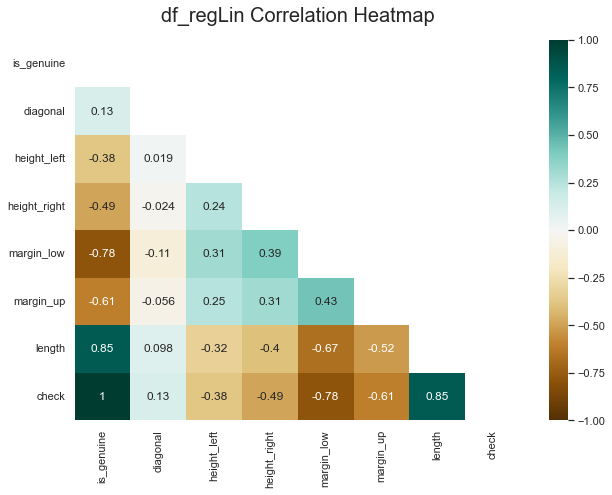

In [67]:
#mask = np.triu(np.df_regLin.corr()(df_regLin.corr(), dtype=np.bool))
plt.figure(figsize=(10,7))

mask = np.triu(np.ones_like(df_regLin.corr(), dtype=bool))
heatmap = sns.heatmap(df_regLin.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('df_regLin Correlation Heatmap', fontdict={'fontsize':20}, pad=18);

# Multicolinéaritée

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_var = df_regLin.set_index("is_genuine")

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_var.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_var.values, i)
for i in range(len(X_var.columns))]

print(vif_data)


        feature        VIF
0      diagonal 170,047.76
1   height_left 119,780.77
2  height_right 112,547.46
3    margin_low     123.24
4     margin_up     296.50
5        length  53,717.46
6         check      18.72


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
iv = df_regLin.columns 
iv = iv.delete(0)
[vif(df_regLin[iv].values, index) for index in range(len(iv))]  
  
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
  
for i in range(len(iv)): 
    vif_list = [vif(df_regLin[iv].values, index) for index in range(len(iv))]  
    maxvif = max(vif_list) 
    
    print("Max VIF value is ", maxvif)
    print("")
    drop_index = vif_list.index(maxvif) 
    print("-----> For Independent variable", iv[drop_index])

     
    if maxvif > 10: 
         
        print("Deleting", iv[drop_index]) 
        iv = iv.delete(drop_index) 
        print("Final Independent_variables ", iv) 
        print("")

Max VIF value is  170047.764240033

-----> For Independent variable diagonal
Deleting diagonal
Final Independent_variables  Index(['height_left', 'height_right', 'margin_low', 'margin_up', 'length',
       'check'],
      dtype='object')

Max VIF value is  86128.0321481218

-----> For Independent variable height_left
Deleting height_left
Final Independent_variables  Index(['height_right', 'margin_low', 'margin_up', 'length', 'check'], dtype='object')

Max VIF value is  42468.4085078904

-----> For Independent variable length
Deleting length
Final Independent_variables  Index(['height_right', 'margin_low', 'margin_up', 'check'], dtype='object')

Max VIF value is  533.9797419290701

-----> For Independent variable height_right
Deleting height_right
Final Independent_variables  Index(['margin_low', 'margin_up', 'check'], dtype='object')

Max VIF value is  90.95982079413446

-----> For Independent variable margin_up
Deleting margin_up
Final Independent_variables  Index(['margin_low', 'chec

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_var = df_regLin.set_index("is_genuine")
X_var = X_var.drop(columns="diagonal")

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_var.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_var.values, i)
for i in range(len(X_var.columns))]

print(vif_data)


        feature       VIF
0   height_left 86,128.03
1  height_right 86,077.46
2    margin_low    123.24
3     margin_up    296.25
4        length 49,412.81
5         check     18.67


# Feature_Selection

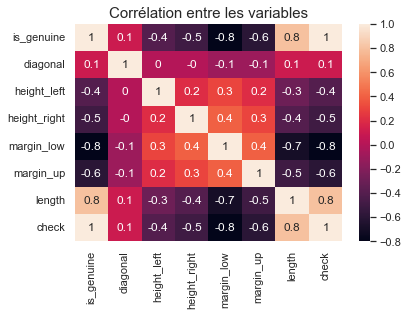

In [71]:
sns.heatmap((df_final.corr()).round(1), cbar=True, annot=True);
plt.title('Corrélation entre les variables',size=15)
plt.show()

In [72]:
df_regLin.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length', 'check'],
      dtype='object')

In [73]:

# Affichage des variances de nos variables

print("Variance diagonal: ", df_regLin.diagonal.var().round(10))
print("Variance height_left: ", df_regLin.height_left.var().round(10))
print("Variance height_right: ", df_regLin.height_right.var().round(10))
print("Variance margin_low: ", df_regLin.margin_low.var().round(10))
print("Variance margin_up: ", df_regLin.margin_up.var().round(10))
print("Variance length: ", df_regLin.length.var().round(10))


Variance diagonal:  0.0931440624
Variance height_left:  0.0896773004
Variance height_right:  0.1060329946
Variance margin_low:  0.4350784752
Variance margin_up:  0.0537373208
Variance length:  0.7616573215


In [74]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import SGDClassifier

In [75]:
features_df_dropna = df_final.loc[:, 'diagonal':'length'].columns
X = df_final.values
X = df_final.loc[:, 'diagonal':'length']

y = df_final["check"].values

In [76]:
selector = RFECV(SGDClassifier(random_state=0),
                 step=1,
                 min_features_to_select=2,
                 cv=5)
selector.fit(X,y)
print("Ranking: ",selector.ranking_)
print("Stochastic gradient descent (SGD) learning: the gradient of the loss is estimated")
print("Ranking: ",selector.cv_results_)

Ranking:  [4 2 1 1 3 1]
Stochastic gradient descent (SGD) learning: the gradient of the loss is estimated
Ranking:  {'mean_test_score': array([0.814     , 0.92466667, 0.694     , 0.92266667, 0.842     ]), 'std_test_score': array([0.07846868, 0.1030771 , 0.29608107, 0.12812147, 0.25531332]), 'split0_test_score': array([0.81      , 0.98333333, 0.95      , 0.66666667, 0.33333333]), 'split1_test_score': array([0.89      , 0.97666667, 0.88      , 0.98333333, 0.93      ]), 'split2_test_score': array([0.91333333, 0.99      , 0.97333333, 0.99666667, 0.99666667]), 'split3_test_score': array([0.74333333, 0.95333333, 0.33333333, 0.98666667, 0.96666667]), 'split4_test_score': array([0.71333333, 0.72      , 0.33333333, 0.98      , 0.98333333])}


In [77]:
pd.DataFrame(selector.cv_results_).T

,0,1,2,3,4
mean_test_score,0.81,0.92,0.69,0.92,0.84
std_test_score,0.08,0.10,0.30,0.13,0.26
split0_test_score,0.81,0.98,0.95,0.67,0.33
split1_test_score,0.89,0.98,0.88,0.98,0.93
split2_test_score,0.91,0.99,0.97,1.00,1.00
split3_test_score,0.74,0.95,0.33,0.99,0.97
split4_test_score,0.71,0.72,0.33,0.98,0.98


In [78]:
df_regLin

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,check
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1
1,True,171.46,103.36,103.66,3.77,2.99,113.09,1
2,True,172.69,104.48,103.50,4.40,2.94,113.16,1
3,True,171.36,103.91,103.94,3.62,3.01,113.51,1
4,True,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,0
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,0
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,0
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,0


In [79]:
# load libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


# creating datasets with and without feature removal 

# find all categorical features
cat_var = [var for var in df_final.columns if df_final[var].dtypes=='object']

# one hot-encode all categorical features 
ohe = pd.get_dummies(df_final["diagonal"])

#  dataframe with removed features
df_fs = df_final.drop(['diagonal'], axis = 1)
df_fs = df_fs.drop(cat_var, axis=1)

# dataframe without removed features
df = df.drop(cat_var, axis=1)

# train test split for both datasets 

X = df_final.drop(['is_genuine','check'], axis=1)
y = df_final['check']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_fs = df_fs.drop(['is_genuine','check'], axis=1)
y_fs = df_fs['check']

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.25, random_state=42)

# Standardization for both datasets 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

sc_fs = StandardScaler()
X_train_fs = sc_fs.fit_transform(X_train_fs)
X_test_fs = sc_fs.transform(X_test_fs)

# making predictions with models for both datasets

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_fs = LogisticRegression()
lr_fs.fit(X_train_fs, y_train_fs)
y_pred_fs = lr_fs.predict(X_test_fs)

In [80]:
# load library
from sklearn.metrics import mean_squared_error

# compute mean_squared errors for both models
mse = mean_squared_error(y_test, y_pred)
mse_fs = mean_squared_error(y_test_fs, y_pred_fs)

print('Mean squared error without feature selection: {}'.format(np.round(mse,5)))
print('Mean squared error with feature selection: {}'.format(np.round(mse_fs,5)))

Mean squared error without feature selection: 0.00533
Mean squared error with feature selection: 0.00533


In [81]:
df_regLin.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length', 'check'],
      dtype='object')

In [82]:
# find coefficients of each feature in the data without feature selection
importance = lr.coef_
importance = pd.DataFrame(lr.coef_)
importance 

dict_importance = {X.columns[i]:importance[i] for i in range(len(X.columns))}
# features to assess
features = ['diagonal', 'height_left', 'height_right', 'margin_low',
            'margin_up', 'length']
feature_importance = [dict_importance[feature] for feature in features]

# tabulate the coefficient values of each feature with and without feature selection
importance = pd.DataFrame()
importance['Feature'] = features
importance['Feature Importance (Without Feature Selection)'] = feature_importance
importance

,Feature,Feature Importance (Without Feature Selection)
0,diagonal,"0 0.08 Name: 0, dtype: float64"
1,height_left,"0 -0.47 Name: 1, dtype: float64"
2,height_right,"0 -0.68 Name: 2, dtype: float64"
3,margin_low,"0 -2.52 Name: 3, dtype: float64"
4,margin_up,"0 -1.52 Name: 4, dtype: float64"
5,length,"0 3.47 Name: 5, dtype: float64"


In [83]:
# find coefficients of each feature in the data wit feature selection
importance_fs = lr_fs.coef_
importance_fs = pd.DataFrame(lr_fs.coef_)
importance_fs 

dict_importance = {X_fs.columns[i]:importance_fs[i] for i in range(len(X_fs.columns))}
# features to assess
features = ['height_left', 'height_right', 'margin_low',
            'margin_up', 'length']
feature_importance = [dict_importance[feature] for feature in features]

# tabulate the coefficient values of each feature with and without feature selection
importance = pd.DataFrame()
importance['Feature'] = features
importance['Feature Importance (Wit Feature Selection)'] = feature_importance
importance

,Feature,Feature Importance (Wit Feature Selection)
0,height_left,"0 -0.46 Name: 0, dtype: float64"
1,height_right,"0 -0.68 Name: 1, dtype: float64"
2,margin_low,"0 -2.55 Name: 2, dtype: float64"
3,margin_up,"0 -1.52 Name: 3, dtype: float64"
4,length,"0 3.48 Name: 4, dtype: float64"


# Normalisation

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
df_final

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,check
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1
1,True,171.46,103.36,103.66,3.77,2.99,113.09,1
2,True,172.69,104.48,103.50,4.40,2.94,113.16,1
3,True,171.36,103.91,103.94,3.62,3.01,113.51,1
4,True,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,0
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,0
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,0
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,0


In [86]:
features = df_final.loc[:, 'diagonal':'length'].columns
X = df_final.loc[:, 'diagonal':'length']
y = df_final["check"].values

In [87]:
from sklearn.preprocessing import StandardScaler
data_norm = (df_final.set_index(["check","is_genuine"]))
transformer = StandardScaler().fit(X) #.fit() Effectue le calcul selon le mode choisi
X_scaled = pd.DataFrame(transformer.transform(X), columns=features) # .transform() applique la formule

In [88]:
# Choix du df a utiliser pour la confection de l’algorithme
# & Sauvegarde des modèles
from pickle import dump


In [89]:
# Enregistrement du transformer (calcul)
dump(transformer, open('./Assets/scaler.pkl', 'wb'))

In [90]:

df_final = df_final[["is_genuine","check"]].merge(X_scaled, left_index = True, right_index=True)
#df_final = df_final.merge(df1.is_genuine, left_index = True, right_index=True)
df_final

,is_genuine,check,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,1,-0.49,2.77,3.16,0.06,-1.13,0.17
1,True,1,-1.63,-2.24,-0.80,-1.08,-0.70,0.47
2,True,1,2.40,1.50,-1.29,-0.13,-0.91,0.55
3,True,1,-1.96,-0.40,0.06,-1.31,-0.61,0.95
4,True,1,-0.75,0.84,-1.41,-0.67,1.42,-0.16
...,...,...,...,...,...,...,...,...
1495,False,0,-0.68,1.17,0.77,-0.10,-0.27,-1.60
1496,False,0,0.76,2.01,1.60,1.19,0.94,-1.96
1497,False,0,-0.52,-0.07,0.61,1.56,0.90,-0.84
1498,False,0,0.33,0.84,0.43,1.04,1.33,-0.49


In [91]:
# Sauvegarde du df_final
#.to_csv('myfile.csv')
df_final.to_csv(r'C:\Users\melle\OneDrive\Bureau\Angele MENDY\df_final.csv')


In [92]:
#ou
df_final.to_csv('Data/df_final.csv')
